In [261]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [262]:
# import salary file

df=pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [263]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [264]:
# checking col datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


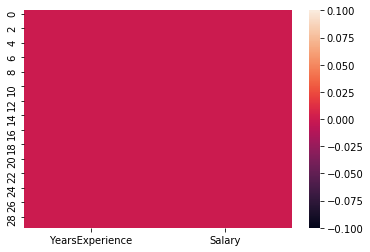

In [265]:
# Checking for null using HeatMap
sns.heatmap(df.isnull())

In [266]:
# Checking which all columns have null values
df.isnull().sum().sort_values(ascending=False)

Salary             0
YearsExperience    0
dtype: int64

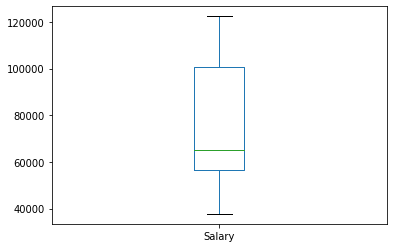

In [267]:
df['Salary'].plot.box()

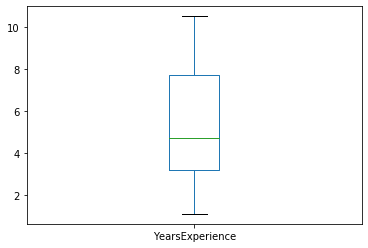

In [268]:
df['YearsExperience'].plot.box()

In [269]:
# Setting x
#x=df['Salary']
x=df.loc[:,'Salary']
x=np.array(x)
x.shape
x

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

In [270]:
#Setting y
#y=df['YearsExperience']
y=df.loc[:,'YearsExperience']
y=np.array(y)

In [271]:
# Reshaping the x & y
# -1 -- many rows
# 1  -- 1 column
x=x.reshape(-1,1)
x.shape

(30, 1)

In [272]:
# Reshaping the x & y
# -1 -- many rows
# 1  -- 1 column
y=y.reshape(-1,1)
y.shape

(30, 1)

In [273]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

x=scale.fit_transform(x)

Visualizing Data

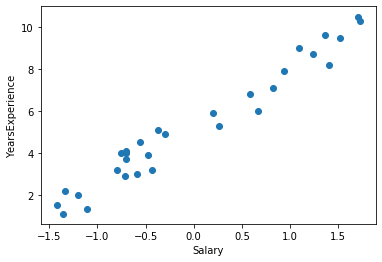

In [274]:
plt.xlabel("Salary")
plt.ylabel("YearsExperience")
plt.scatter(x,y)

In [275]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=99)

In [276]:
train_x.shape

(22, 1)

In [277]:
train_y.shape

(22, 1)

In [278]:
test_x.shape
test_x

array([[ 1.40274136],
       [ 1.24020308],
       [-0.37004264],
       [-0.70662043],
       [ 0.82623317],
       [ 1.3590738 ],
       [-0.47433279],
       [-0.29921736]])

In [279]:
test_y.shape
test_y

array([[8.2],
       [8.7],
       [5.1],
       [4. ],
       [7.1],
       [9.6],
       [3.9],
       [4.9]])

In [280]:
lm=LinearRegression()
lm.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [281]:
lm.score(x,y)

0.9562004089989466

In [282]:
lm.coef_

array([[2.80021344]])

In [283]:
lm.intercept_

array([5.28359739])

In [284]:
pred=lm.predict(test_x)

In [285]:
print("Mean absolute error",mean_absolute_error(test_y,pred))
print("Mean squared error",mean_squared_error(test_y,pred))
print("Root Mean absolute error",np.sqrt(mean_squared_error(test_y,pred)))

#Model performance
print("\nR2 Score: ",r2_score(test_y,pred))


Mean absolute error 0.5166583585603475
Mean squared error 0.3692536067515754
Root Mean absolute error 0.6076624118304302

R2 Score:  0.9160757454735579


In [286]:
# Saving the model

from sklearn.externals import joblib
joblib.dump(lm,"lm_salary.pkl")

['lm_salary.pkl']